# Agent相关概念
通用人工智能（AGI）将是AI的终极形态，几乎已成为业界共识。同样，构建智能体（Agent）则是AI工程应用当下的“终极形态”。

将 AI 和人类协作的程度类比自动驾驶的不同阶段：

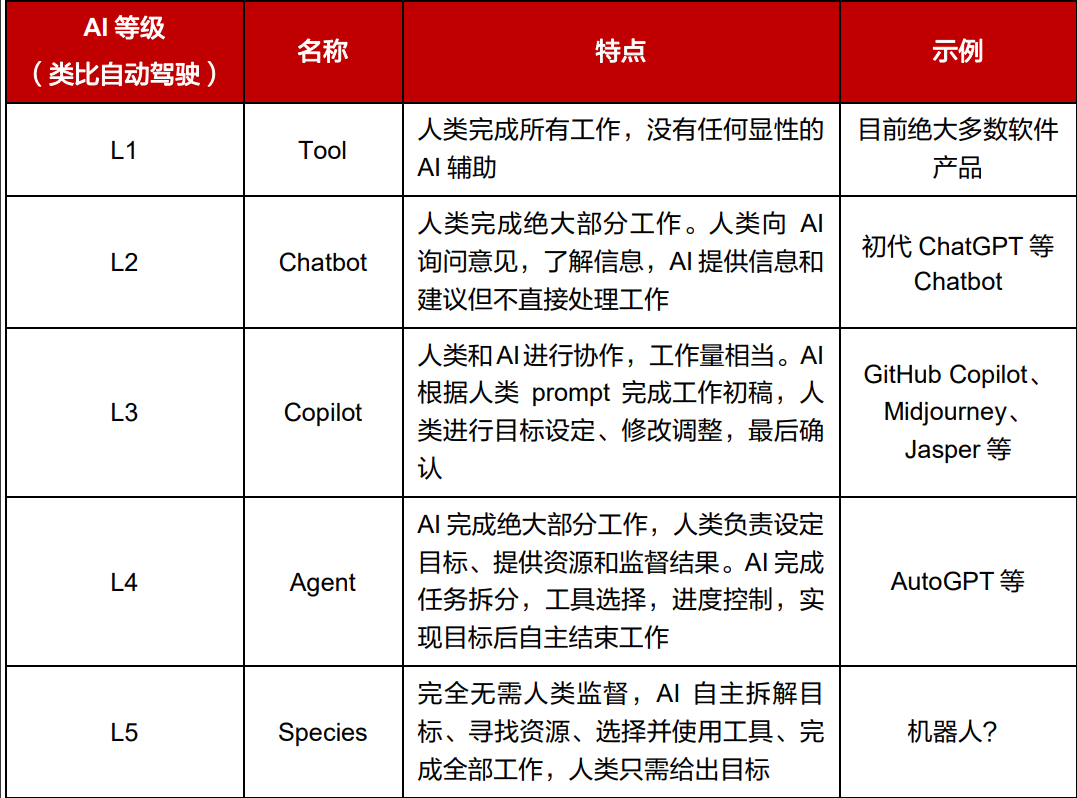

## Agent与Chain的区别
在Chain中行动序列是 **硬编码的**、**固定流程的** ，像是“线性流水线”，而Agent则采用语言模型作为推理引擎 ，具备一定的 **自主决策** 能力，来确定以什么样的顺序采取什么样的行动，像是“拥有大脑的机器工人”。

简单来说，Chain是“写死的”、是“固定”的，而Agent是“有智能的”、“有自主的”。

Agent可以根据任务动态决定 ：
* 如何拆解任务
* 需要调用哪些工具
* 以什么顺序调用
* 如何利用好**中间结果**来推进任务
## 什么是Agent
Agent（智能体） 是一个通过动态协调 大语言模型（LLM） 和 工具（Tools） 来完成复杂任务的智能系统。它让LLM充当"决策大脑"，根据用户输入自主选择和执行工具（如搜索、计算、数据库查询等），最终生成精准地响应。

作为一个智能体，需要具备以下核心能力：

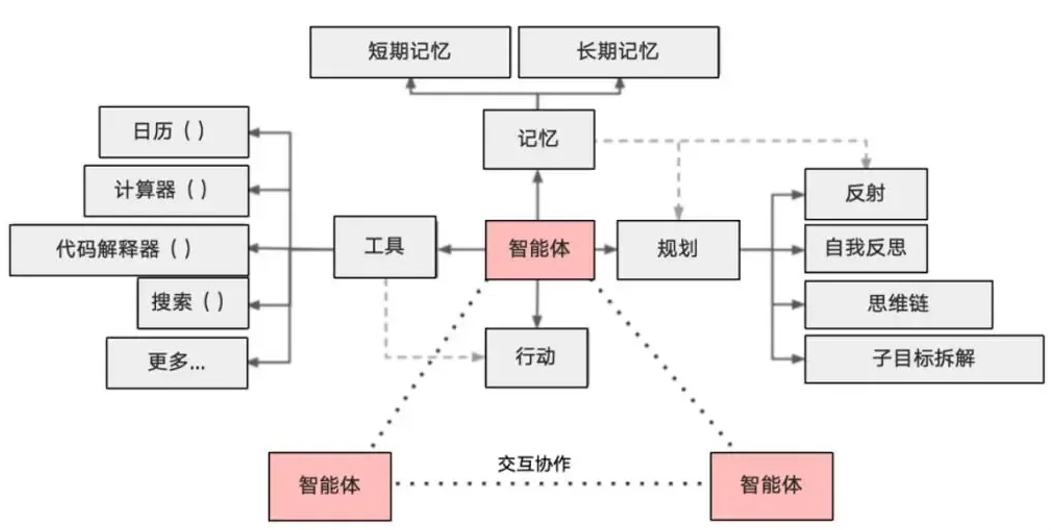

1. 大模型(LLM)：作为大脑，提供推理、规划和知识理解能力。比如：OpenaAI()、ChatOpenAI()
2. 记忆(Memory)：具备短期记忆（上下文）和长期记忆（向量存储），支持快速知识检索。比如：`ConversationBufferMemory`、`ConversationSummaryMemory`、`ConversationBufferWindowMemory`等组件
3. 工具(Tools)：调用外部工具（如API、数据库）的执行单元
4. 规划(Planning)：任务分解、反思与自省框架实现复杂任务处理
5. 行动(Action)：实际执行决策的能力。比如：检索、推理、编程
6. 协作：通过与其他智能体交互合作，完成更复杂的任务目标




**问题：为什么非得要调用第三方工具呢？**

答：虽然大语言模型的能力已经很强大了，但它也具备一定的局限性，比如它训练的数据截止2024年，无法掌握实时的数据，就需要借助网络搜索工具来获取实时的互联网数据。

另一方面我们的互联网行业经过几十年的发展，也已经沉淀出了非常多的工具和数据，非常需要借助这些工具来赋能AI。

## Agent的几个关键组件
**1、工具 Tool**

LangChain 提供了广泛的入门工具，但也支持 自定义工具 ，包括自定义描述。在框架内，每个功能或函数被 封装成一个工具 （Tools），具有自己的输入、输出及处理方法。

具体使用步骤：
1. Agent 接收任务后，通过大模型推理选择适合的工具处理任务。
2. 选择好工具后，模型根据任务和工具描述，传递合适的参数给工具，工具处理输入，生成输出。
3. Agent拿到输出后，根据策略可以将输出直接返回给用户，或者将输出作为下一次任务的输入。

**2、工具集 Toolkits**

在构建Agent时，通常提供给LLM的工具不仅仅只有一两个，而是一组可供选择的工具集(Tool列表)，
这样可以让 LLM 在完成任务时有更多的选择。

**3、智能体/代理 Agen**

智能体/代理（agent）可以协助我们做出决策，调用相应的 API。底层的实现方式是通过 LLM 来决定下一步执行什么动作。

**4、代理执行器 AgentExecutor**
AgentExecutor本质上是Agent的运行时，负责协调智能体的决策和实际的工具执行。

> 可以这么理解Agent和AgentExecutor的关系：Agent是大脑，Agent是手脚；Agent负责思考，AgentExecutor负责具体地执行。

# Agent入门使用
## 1、Agent、AgentExecutor的创建
创建Agent和AgentExecutor都有两种方式，分别是传统方式和通用方式。具体区别见下表：
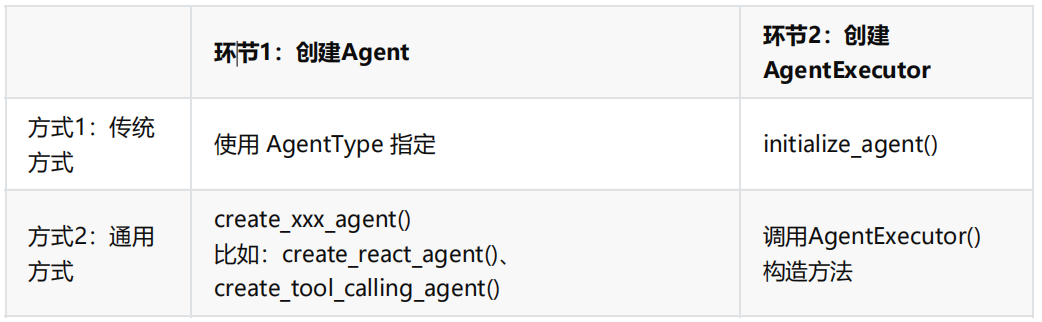
## 2、Agent的类型
顾名思义就是某件事可以由不同的⼈去完成，最终结果可能是⼀样的，但是做的过程可能各有千秋。⽐如⼀个公司需求， 普通开发 可以编写， 技术经理 也可以编写， CTO 也可以编写。虽然都能完成最后的需求，但是CTO做的过程可能更加直观，⾼效。

在LangChain中Agent的类型就是为你提供不同的"问题解决姿势"的。

相关AgentType的API说明：https://sj-langchain.readthedocs.io/en/latest/agents/langchain.agents.agent_types.AgentType.html

Agents的核心类型有两种模式：
* 方式1：Funcation Call模式
* 方式2：ReAct 模式


### FUNCATION_CALL模式
* 基于 结构化函数调用 （如 OpenAI Function Calling）
* 直接生成工具调用参数（ JSON 格式 ）
* 效率更高，适合工具明确的场景
* 通过AgentType可以快速创建一个Agent，已经有内置好的prompt，不需要用户再自定义prompt了

**典型 AgentType：**

```python
# 第1种：
AgentType.OPENAI_FUNCTIONS
# 第2种：
AgentType.OPENAI_MULTI_FUNCTIONS
```

**工作流程示例：**
```text
第1步：找到Search工具：{"tool": "Search", "args": {"query": "LangChain最新版本"}}
第2步：执行Search工具
======================================
第1步：找打scrape_website工具：{"tool": "Search", "args": {"target": "LangChain最新版本","url":"要
抓取的网站地址"}}
第2步：执行scrape_website工具
```

### ReAct 模式
* 基于 文本推理 的链式思考（Reasoning + Acting），具备反思和自我纠错能力。
    * 推理（Reasoning）：分析当前状态，决定下一步行动
    * 行动（Acting）：调用工具并返回结果
* 通过 自然语言描述决策过程
* 适合需要明确推理步骤的场景。例如智能客服、问答系统、任务执行等。
* 需要开发者自己定义提示词模板，但好处是灵活，可以定制化提示词模板

**典型 AgentType：**

```python
# 第1种：零样本推理(可以在没有预先训练的情况下尝试解决新的问题)
AgentType.ZERO_SHOT_REACT_DESCRIPTION
# 第2种：无记忆对话
AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION
# 第3种：带记忆对话
AgentType.CONVERSATIONAL_REACT_DESCRIPTION
```

**工作流程示例：**
```text
问题：我想要查询xxx
思考：我需要先搜索最新信息 → 行动：调用Search工具 → 观察：获得3个结果 →
思考：需要抓取第一个链接 → 行动：调用scrape_website工具...→ 观察：获得工具结果
最后：获取结果
```

**Agent两种典型类型对比表**

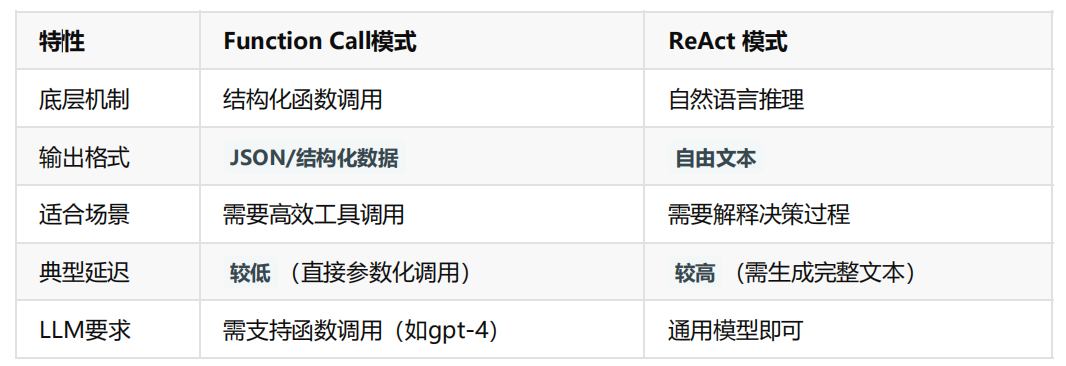

## AgentExecutor创建方式
### 传统方式：initialize_agent()
**特点：**
* 内置一些标准化模板（如 ZERO_SHOT_REACT_DESCRIPTION ）
* Agent的创建：使用AgentType

**优点：** 快速上手（3行代码完成配置）


**缺点：** 定制化能力较弱（如提示词固定）

示例代码：
```python
from langchain_classic.agents import initialize_agent

#第1步：创建AgentExecutor
agent_executor = initialize_agent(
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    tools=[search_tool],
    verbose=True
)
#第2步：执行
agent_executor.invoke({"xxxx"})
```

### 通用方式：AgentExecutor构造方法
**特点：** Agent的创建：使用`create_xxx_agen`方式来创建Agent

**优点：**
* 可自定义提示词（如从远程hub获取或本地自定义）
* 清晰分离Agent逻辑与执行逻辑

**缺点：**
* 需要更多代码
* 需理解底层组件关系

示例代码：
```python
prompt = hub.pull("hwchase17/react")
tools = [search_tool]
#第1步：创建Agent实例
agent = create_react_agent(
llm=llm,
prompt=prompt,
tools=tools
)
#第2步：创建AgentExecutor实例
agent_executor = AgentExecutor(
agent=agent,
tools=tools
)
#第3步：执行
agent_executor.invoke({"input":"xxxxx"})
```

## 小结创建方式
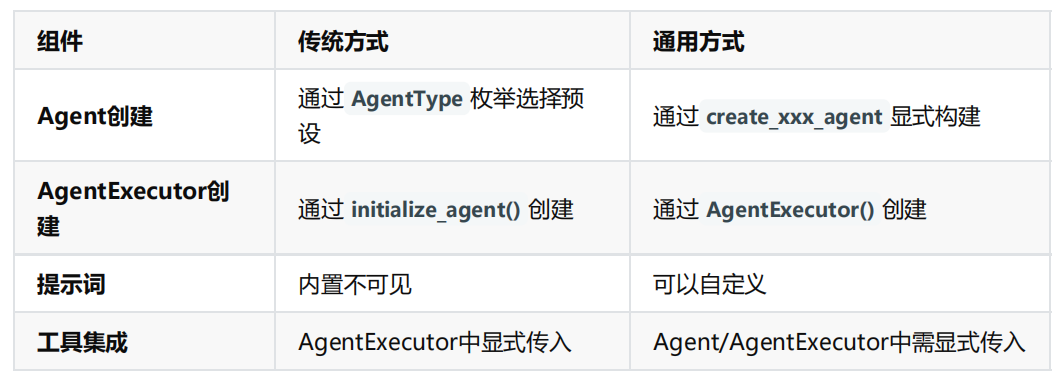

**下面我们就正式开始Agent的代码开发工作，详见下面的章节。**